In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vtspy import *

## Step 1. Load Fermi-LAT and VERITAS datasets

In [3]:
joint = JointAnalysis(fermi="analyzed", veritas="analyzed")

2022-06-14 22:54:27 INFO    : Initialize the joint-fit analysis...


2022-06-14 22:54:27 INFO    : Initialize the VERITAS analysis.


2022-06-14 22:54:27 INFO    : The setup is found [state_file = analyzed]. Read the state.


2022-06-14 22:54:27 INFO    : Completed (VERITAS initialization).


2022-06-14 22:54:27 INFO    : Initializing the Fermi-LAT analysis...


2022-06-14 22:54:30 INFO    : The setup and configuration is found [state_file = analyzed]. Loading the configuration...


2022-06-14 22:54:40 INFO    : Loading the Fermi-LAT events...


2022-06-14 22:54:40 INFO    : Loading the Fermi-LAT IRFs...


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-14 22:54:40 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'. [astropy.wcs.wcs]
2022-06-14 22:54:40 WARNING : FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184' from MJDREF.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'.


2022-06-14 22:54:40 INFO    : Loading the Fermi-LAT models...


2022-06-14 22:54:41 INFO    : Ready to perform a gammapy analysis.


2022-06-14 22:54:41 INFO    : The target, 4FGL J1221.3+3010, is associated with 2 source(s).


2022-06-14 22:54:41 INFO    : Completed (Fermi-LAT initialization).


2022-06-14 22:54:41 INFO    : Constructing a joint datasets


2022-06-14 22:54:41 INFO    : Completed.


### Check datasets and models

In [4]:
joint.print_datasets()

2022-06-14 22:54:41 INFO    : Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : fermi
  Instrument : 
  Models     : ['1ES1218+304', '4FGL J1217.9+3007', '4FGL J1225.9+2951', '4FGL J1221.5+2814', '4FGL J1231.7+2847', '4FGL J1159.5+2914', '4FGL J1230.2+2517', 'isodiff', 'galdiff']

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : veritas
  Instrument : 
  Models     : ['1ES1218+304']




In [5]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,index,3.1270e+00,,1.223e-01,nan,nan,False,False,
1ES1218+304,spectral,amplitude,4.4324e-12,cm-2 s-1 TeV-1,6.802e-13,nan,nan,False,True,
1ES1218+304,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lon_0,1.8534e+02,deg,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lat_0,3.0168e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,


### Check a global SED before the fit

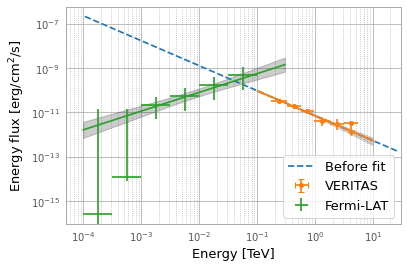

In [6]:
joint.sed_plot()

### Change the spectral model

2022-06-14 22:54:43 INFO    : The spectral model for the target is chaged:


2022-06-14 22:54:43 INFO    : PowerLawSpectralModel->LogParabolaSpectralModel


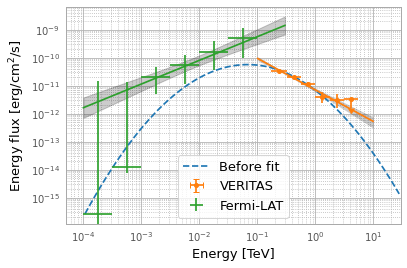

In [7]:
joint.change_model("logparabola", refit=True)
joint.sed_plot()

## Step 2. Run a joint-fit analysis

In [8]:
joint.fit()

2022-06-14 22:54:44 INFO    : Start fitting...


2022-06-14 23:00:12 INFO    : Fit successfully.


### Check a global SED after the fit

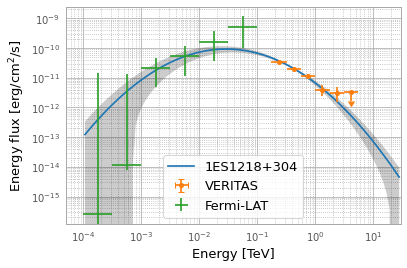

In [9]:
joint.sed_plot(show_flux_points=True)